<a href="https://colab.research.google.com/github/Cal-Poly-Data-301/lab-1-phase-2-DylanC3/blob/main/DATA_301_Lab_1B_Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore the In Class Survey

During the first class, you filled out the [first-day survey](https://docs.google.com/forms/d/e/1FAIpQLSczqKwzkye0RP8byLMxzj1Br3kC_YUdVGLWmMXX6VND99ivWg/viewform). In this lab, you will explore [the responses](https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit?usp=sharing).

Download the spreadsheet from the link above, then read the data into a `pandas` `DataFrame` whose columns are the survey questions. Each row represents one student's response to the questions.

## Question 1

Make a graphic that visualizes the favorite colors of students in DATA 301. Explain what you see.

(_Hint:_ You might have to clean the data a bit first.)

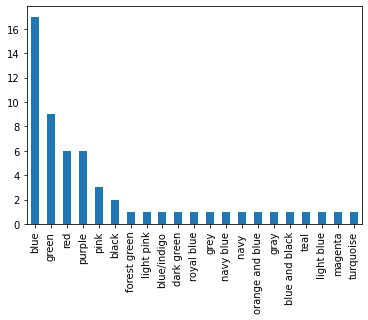

In [1]:
import pandas as pd
sheet_url = "https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit#gid=970845822"
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_survey = pd.read_csv(url_1)

def lower_func(s):
  return s.lower()

df_survey['What is your favorite color?'] = df_survey['What is your favorite color?'].map(lower_func) # clean data
df_survey['What is your favorite color?'].value_counts().plot.bar()

In [ ]:
# since it's open ended question there's lots of variation of answers.
# blue is by far the most favorite color with other variations of blue included as well.

## Question 2

Is there a relationship between the number of siblings a student has, and whether or not they live in SLO?

Make a visualization to address this question, and discuss the result.

In [2]:
df_survey['Where are you living this quarter?'].value_counts()

Off Campus, but in SLO        30
Off Campus, outside of SLO    25
On-Campus housing              2
Name: Where are you living this quarter?, dtype: int64

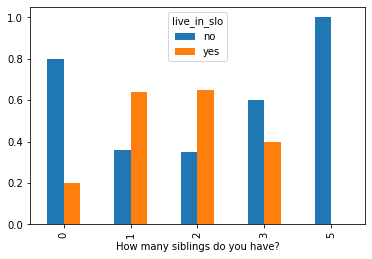

In [3]:
df_survey["live_in_slo"] = df_survey['Where are you living this quarter?'].map({
    "Off Campus, but in SLO" : "yes",
    "Off Campus, outside of SLO" : "no",
    "On-Campus housing" : "yes"
})

joint_siblings_slo = pd.crosstab(df_survey["How many siblings do you have?"], df_survey["live_in_slo"], normalize=True)
live_in_slo_dist = joint_siblings_slo.sum(axis=1) # sum live in slo over siblings
cond_sib_given_slo = joint_siblings_slo.divide(live_in_slo_dist, axis=0) 

cond_sib_given_slo.plot.bar()

In [ ]:
# It appears that with 0 siblings, most students choose to live outside of SLO, and with 3 or more siblings, 
# they also tend to live outside of SLO. The only students that are more likely to stay within SLO are those who 
# have 1 or 2 siblings. This data may be skewed however because very few siblings have 1, 3, and 5 siblings compared 
# to those with 1 or 2, so outliers will heavily impact the data.

## Question 3

You were asked to guess how many golf balls fit into a standard-sized school bus.  This is actually a famous Google interview question!  The best answer I could find online is [here](https://www.quora.com/How-many-golf-balls-can-fit-into-a-school-bus).

How did the different subgroups in the class do on this question?  That is, can you find an interesting relationship between the golf ball numbers guess and any of the other variables in this dataset?

(_Hint:_ There are many reasonable approaches to this problem. You will get full credit for any reasonable approach, as long as you carefully justify it.)

In [55]:
# assuming the correct answer is 884520
def calc_percent_error(v):
  return ((abs(v - 884520)) / 884520) * 100
df_survey["percent_error"] = df_survey['Suppose you wanted to fill an average-sized school bus entirely with golf balls.  How many golf balls do you think you would need?'].map(calc_percent_error)

In [58]:
df_survey[df_survey["Do you consider yourself artistic?"] == "Yes"].percent_error.mean(), df_survey[df_survey["Do you consider yourself artistic?"] == "No"].percent_error.mean()

(140.64439273376473, 118.7957755231247)

In [57]:
df_survey[df_survey["Do you consider yourself artistic?"] == "Yes"].percent_error.median(), df_survey[df_survey["Do you consider yourself artistic?"] == "No"].percent_error.median()

(96.72590783701894, 88.69443313887759)

In [50]:
df_survey[df_survey["Do you consider yourself a sports fan?"] == "Yes"].percent_error.mean(), df_survey[df_survey["Do you consider yourself a sports fan?"] == "No"].percent_error.mean()

(182.5955478593956, 79.43849625749269)

In [59]:
df_survey[df_survey["Do you consider yourself a sports fan?"] == "Yes"].percent_error.median(), df_survey[df_survey["Do you consider yourself a sports fan?"] == "No"].percent_error.median()

(97.73888662777551, 71.73608284719396)

In [51]:
df_survey[df_survey["What is your major?"] == "Computer Science"].percent_error.mean(), df_survey[~(df_survey["What is your major?"] == "Computer Science")].percent_error.mean()

(165.58080898737987, 89.33895570868751)

In [60]:
df_survey[df_survey["What is your major?"] == "Computer Science"].percent_error.median(), df_survey[~(df_survey["What is your major?"] == "Computer Science")].percent_error.median()

(77.38886627775517, 88.69443313887759)

In [52]:
df_survey[df_survey["Do you enjoy video games?"] == "Yes"].percent_error.mean(), df_survey[(df_survey["Do you enjoy video games?"] == "No")].percent_error.mean()

(117.99311812056256, 160.22945082774143)

In [61]:
df_survey[df_survey["Do you enjoy video games?"] == "Yes"].percent_error.median(), df_survey[(df_survey["Do you enjoy video games?"] == "No")].percent_error.mean()

(86.4333197666531, 160.22945082774143)

In [53]:
df_survey[df_survey['live_in_slo'] == "yes"].percent_error.mean(), df_survey[df_survey['live_in_slo'] == "no"].percent_error.mean()

(122.81184561259214, 136.26600642156194)

In [62]:
df_survey[df_survey['live_in_slo'] == "yes"].percent_error.median(), df_survey[df_survey['live_in_slo'] == "no"].percent_error.median()

(95.3647175869398, 71.73608284719396)

In [63]:
# I would like to start by saying that these values are not conclusive in any way, especially since many
# assumptions were taken such as what the "correct answer" was in the first place. 

# Based off of the mean of percent error of the guesses here are the results:
  # artistic people did sligtly worse than non artistic people
  # sports fans did significantly worse than non sports fans
  # computer science majors did worse than non-cs majors
  # video game players did better than non video game players
  # those who live in slo did slightly better than those who do not live in slo

# However, mean is not always the best because outliers heavily affect them
# so, here are the results based off of the median instead: 
  # artistic people did sligtly worse than non artistic people (same as mean)
  # sports fans did worse than non sports fans (same as mean, not as drastic)
  # computer science majors did BETTER than non-cs majors
  # video game players did better than non video game players (same as mean)
  # those who live in slo did worse than those who do not live in slo
# lower sum of percent error = "doing better"

## Question 4

Write and answer your own question using this data set.

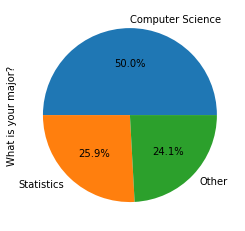

In [64]:
# Q: Make a visual to find the most common majors in DATA301.
df_survey["What is your major?"].value_counts().plot(kind='pie', autopct='%1.1f%%')

# wanted to try making a pie chart (found solution using google)